In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, f1_score, classification_report, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt

combined_df_final = pd.read_csv('/content/drive/MyDrive/bankruptcy prediction/combined_df_final.csv')
DEA_df = pd.read_csv("/content/drive/MyDrive/bankruptcy prediction/DEA_df_nrsample2.csv")
combined_df_final.head()

,company_name,status_label,year,current_assets,cost_of_goods_sold,depreciation_and_amortization,ebitda,inventory,net_income,total_receivables,...,EiTA,MCTL,STA,TRTA,Net Profit Margin,ROA,Current Ratio,Quick Ratio,Debt to asset ratio,is_alive
0,C_1001,alive,1999,7965.5,34240.1,171.7,308.2,4149.3,723.7,3034.5,...,0.013159,0.874148,3.539271,3.539271,0.019713,0.069768,1.555215,0.745090,0.656239,0
1,C_1001,alive,2000,9164.0,39397.2,181.8,389.8,5116.4,-48.3,3443.4,...,0.018040,0.945197,3.643570,3.643570,-0.001150,-0.004189,1.399148,0.617983,0.697057,0
2,C_1001,alive,2001,10698.7,47069.0,132.6,901.3,6011.5,418.6,4001.5,...,0.057693,1.148472,3.753077,3.753077,0.008371,0.031417,1.409950,0.617712,0.704285,0
3,C_1001,alive,2002,11253.6,53847.9,119.4,1073.2,6022.5,555.4,4594.7,...,0.066451,0.738900,3.979601,3.979601,0.009723,0.038695,1.411216,0.655987,0.684500,0
4,C_1001,alive,2003,13004.2,66153.6,126.0,1040.3,6735.1,646.5,5418.8,...,0.056299,0.788732,4.279880,4.279880,0.009301,0.039809,1.375218,0.662969,0.681944,0


In [ ]:
DEA_df.head()

,current_assets,ebitda,cost_of_goods_sold,depreciation_and_amortization,inventory,net_income,total_receivables,market_value,net_sales,total_assets,...,total_current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating_expenses,equity,working_capital,year,status_label,company_name
0,7.004181,11.785699,17.744070,2.559048,25.584398,33.063652,7.131554,1.548805,14.696679,3.736106,...,5.338786,26.717302,14.696679,3.606177,18.120921,19.065963,24.867908,1999,alive,C_1001
1,7.907580,11.874106,20.265991,2.650757,31.314417,32.184937,7.957783,1.700630,16.673067,4.041294,...,6.548395,26.680064,16.673067,4.077061,20.573973,19.020745,24.548294,2000,alive,C_1001
2,9.064398,12.428277,24.017649,2.204017,36.617841,32.716378,9.085488,1.993980,19.656211,4.514534,...,7.427964,26.990228,19.656211,4.592739,24.093953,19.298132,25.239909,2001,alive,C_1001
3,9.482667,12.614518,27.332662,2.084160,36.683015,32.872088,10.284117,1.669554,22.310597,4.786065,...,7.755293,27.281602,22.310597,4.761582,27.359217,19.663101,25.474674,2002,alive,C_1001
4,10.802225,12.578873,33.350387,2.144089,40.905135,32.975781,11.949305,1.805642,26.931299,5.283757,...,9.010477,27.637254,26.931299,5.240161,33.199530,20.058091,25.849322,2003,alive,C_1001


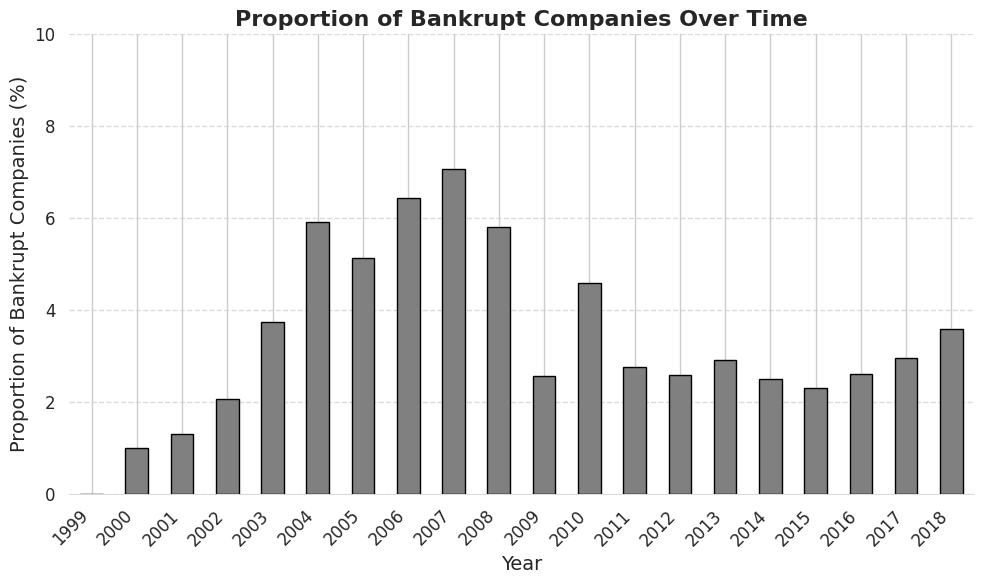

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot to be more suitable for a journal
sns.set(style="whitegrid")
filtered_df = combined_df_final[combined_df_final['company_name'].isin(DEA_df['company_name'])]

# Group by year and calculate the proportion of failed vs alive companies
proportion_df = filtered_df.groupby('year')['is_alive'].value_counts().unstack().fillna(0)
proportion_df['proportion_failed'] = proportion_df[1] *100/ (proportion_df[0] + proportion_df[1])

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the proportion of failed companies
proportion_df['proportion_failed'].plot(kind='bar', color='gray', edgecolor='black')

# Improve the aesthetics
plt.title('Proportion of Bankrupt Companies Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Proportion of Bankrupt Companies (%)', fontsize=14)

# Remove unnecessary chart elements for a cleaner look
plt.xticks(rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylim(0, 10)  # Set y-axis limit between 0 and 1 to represent proportion
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_linewidth(0.5)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.savefig("proportion_of_bankrupt_companies.png")
plt.show()




In [ ]:
!pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.8 MB/s eta 0:00:00


#CBR-GA Model

In [ ]:
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import f1_score



# Select random 100 alive companies
alive_companies = combined_df_final[combined_df_final['status_label'] == 'alive'].sample(n=300)

# Select random 100 failed companies
failed_companies = combined_df_final[(combined_df_final['status_label'] == 'failed') & (combined_df_final['is_alive'] == 1)].sample(n=300)

# Combine the selected companies
selected_companies = pd.concat([alive_companies, failed_companies])

# Select the desired columns
#
selected_columns = ['status_label', 'company_name', 'year', "CLTA","TDTA","CACL","NITA","WCTA", "RETA", "MCTL", "STA"]

# Create the final DataFrame
cbr_df = selected_companies[selected_columns]


cbr_df.shape
# "CLTA","TDTA","CACL","NITA","WCTA", "RETA", "MCTL", "STA",
# "total_liabilities", "total_long_term_debt", "current_assets", "total_operating_expenses","gross_profit", "net_sales", "total_revenue", "net_income", "market_value"

# IN: "total_liabilities, total_long_term_debt, current_assets, total_operating_expenses,",,,
# oT: "gross_profit, net_sales, total_revenue, net_income, market_value,",,,
# IN: CLTA,TDTA,
# OT: CACL,NITA,WCTA, RETA, MCTL, STA,

(600, 11)

#Logistic Regression

In [ ]:

from sklearn.linear_model import LogisticRegression

# Features and target variable
X = cbr_df[["CLTA","TDTA","CACL","NITA","WCTA", "RETA", "MCTL", "STA"]]
y = cbr_df['status_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Print the coefficients
print("Coefficients:")
for feature, coef in zip(["CLTA","TDTA","CACL","NITA","WCTA", "RETA", "MCTL", "STA"], model.coef_[0]):
  print(f"{feature}: {coef}")


Coefficients:
CLTA: 0.8451113127221874
TDTA: 1.3061981968453975
CACL: -0.16393396293930165
NITA: -2.6107942657578214
WCTA: -0.6647469091501368
RETA: 0.003771782662518732
MCTL: -0.07524860456875812
STA: 0.1409944073316941


### Negative weights are difficult to handel in DEA models

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Extract the coefficients
coefficients = model.coef_[0]

# Reshape the coefficients to a 2D array for scaling
coefficients_reshaped = coefficients.reshape(-1, 1)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the coefficients and transform them
normalized_coefficients = scaler.fit_transform(coefficients_reshaped)

# Print the normalized coefficients
print("Normalized Coefficients:")
for feature, coef in zip(["CLTA","TDTA","CACL","NITA","WCTA", "RETA", "MCTL", "STA"], normalized_coefficients):
  print(f"{feature}: {coef[0]}")


Normalized Coefficients:
CLTA: 0.8822854808822447
TDTA: 1.0
CACL: 0.6246783281253356
NITA: 0.0
WCTA: 0.4968218282744279
RETA: 0.6674932549353718
MCTL: 0.6473195150097248
STA: 0.7025259045968874


#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'status_label' is your target variable and the rest are features
X = cbr_df.drop(['status_label', 'company_name'], axis=1)
y = cbr_df['status_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X, y)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")




Accuracy: 1.0


### The accuracy of 1 essencially overfits the data, hence the weights might not be as reliable.

In [ ]:
feature_importances = clf.feature_importances_

features = [ "CLTA","TDTA","CACL","NITA","WCTA", "RETA", "MCTL", "STA", "year"]
# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Optional: Normalize the weights
importance_df['Normalized_Importance'] = importance_df['Importance'] / importance_df['Importance'].sum()

print(importance_df)

  Feature  Importance  Normalized_Importance
0    CLTA    0.090838               0.090838
1    TDTA    0.050872               0.050872
2    CACL    0.051862               0.051862
3    NITA    0.070813               0.070813
4    WCTA    0.175085               0.175085
5    RETA    0.004474               0.004474
6    MCTL    0.034715               0.034715
7     STA    0.439706               0.439706
8    year    0.081636               0.081636


In [ ]:
!pip install pygad

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.1 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE


features = [ "CLTA","TDTA","CACL","NITA","WCTA", "RETA", "MCTL", "STA"]
X = cbr_df[features]
y = cbr_df['status_label']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
def balance_classes(X, y):
    # Ensure classes are balanced in training and test splits
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to the training data to balance the classes
    smote = SMOTE(random_state=42)
    X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

    return X_train_bal, X_test, y_train_bal, y_test

# Step 2: Define Weighted Distance Metric
def weighted_euclidean_distance(data1, data2, weights):
    return np.sqrt(np.sum(weights * (data1 - data2) ** 2))

# Step 3: CBR Model
def get_weighted_similar_cases(new_data, weights, k=5):
    distances = np.array([weighted_euclidean_distance(new_data, row, weights) for row in X_train])
    nearest_indices = distances.argsort()[:k]
    return y_train.iloc[nearest_indices]

def predict_weighted_failure(new_data, weights, k=5):
    similar_cases = get_weighted_similar_cases(new_data, weights, k)
    if (similar_cases == 'failed').sum() > (similar_cases == 'alive').sum():
        return 'failed'
    else:
        return 'alive'


# Define the fitness function
def fitness_func(ga_instance, solution, solution_idx):
    weights = np.array(solution)
    correct_predictions = 0
    predictions = []

    # Predict on test set
    for index, row in enumerate(X_test):
        true_label = y_test.iloc[index]
        prediction = predict_weighted_failure(row, weights)
        predictions.append(prediction)
        if prediction == true_label:
            correct_predictions += 1

    # Calculate F1 score
    accuracy = correct_predictions / len(X_test)
    f1 = f1_score(y_test, predictions, pos_label='failed', average='binary')

    return accuracy


# Initialize DataFrame to store results
results_df = pd.DataFrame(columns=['Fold', 'Accuracy', 'Best_Weights'])

# 10-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(X_scaled)):
    print(f"Processing Fold {fold+1}...")

    # Split data for this fold
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Genetic Algorithm parameters
    num_generations = 100
    num_parents_mating = 5
    sol_per_pop = 30
    num_genes = len(features)
    init_range_low = 0.1
    init_range_high = 1.0

    # Create initial population
    ga_instance = pygad.GA(num_generations=num_generations,
                           num_parents_mating=num_parents_mating,
                           fitness_func=fitness_func,
                           sol_per_pop=sol_per_pop,
                           num_genes=num_genes,
                           initial_population=np.random.uniform(init_range_low, init_range_high, (sol_per_pop, num_genes)),
                           gene_space=[(init_range_low, init_range_high)] * num_genes,
                           parent_selection_type="tournament",
                           keep_parents=1,
                           crossover_type="single_point",
                           crossover_probability=0.5,
                           mutation_type="random",
                           mutation_probability=0.2)

    ga_instance.run()

    # Retrieve fitness history and best solution
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    results_df = pd.concat([results_df, pd.DataFrame({
            'Fold': [fold + 1],
            'Best_acc_Score': [solution_fitness],
            'Best_Weights': [solution]
        })], ignore_index=True)



In [7]:
results_df = pd.read_csv('/content/drive/MyDrive/bankruptcy prediction/cbr_cross_validation_resultsWeight.csv')
weights = results_df.iloc[-1, :]
weights


,10
Fold,Weights
Best_Acc_Score,0.872713
CLTA,0.55
TDTA,0.683502
CACL,0.520113
NITA,0.668811
WCTA,0.507239
RETA,0.51699
MCTL,0.73
STA,0.17432


## SBM model results

In [ ]:
def calculate_metrics(df_dea, df_actual, threshold, target_class='failed' ):
    df_dea['predicted_status'] = np.where(df_dea['Efficiency'] >= threshold, 'alive' ,'failed')
    df_combined = pd.merge(df_dea, df_actual[['dmu_names', 'status_label']], on='dmu_names')
    df_combined['predicted_binary'] = np.where(df_combined['predicted_status'] == target_class, 1, 0)
    df_combined['actual_binary'] = np.where(df_combined['status_label'] == target_class, 1, 0)
    df_combined.dropna(subset=['actual_binary', 'Efficiency'], inplace=True)
    accuracy = accuracy_score(df_combined['actual_binary'], df_combined['predicted_binary'])
    acc_bankrupt = accuracy_score(df_combined[df_combined['status_label'] == target_class]['actual_binary'], df_combined[df_combined['status_label'] == target_class]['predicted_binary'])
    auc = roc_auc_score(df_combined['actual_binary'], df_combined['Efficiency'])
    aps = average_precision_score(df_combined['actual_binary'], df_combined['Efficiency'])
    auc2 = roc_auc_score(df_combined['actual_binary'], df_combined['predicted_binary'])

    tn, fp, fn, tp = confusion_matrix(df_combined['actual_binary'], df_combined['predicted_binary']).ravel()
    type_i_error = fp / (fp + tn)  # False positive rate
    type_ii_error = fn / (fn + tp)  # False negative rate
    # crep = classification_report(df_combined['actual_binary'], df_combined['predicted_binary'])
    tpr = tp / (tp + fn)  # True Positive Rate

    return {
        "AUC": auc,
        "AUC2": auc2,
        "Precision Score": aps,
        f"Accuracy {target_class}": acc_bankrupt,
        f"Type I Error (False {target_class} Rate)": type_i_error,
        f"Type II Error (False non-{target_class} Rate)": type_ii_error,
        "TPR": tpr,
        "threshold": threshold
        # "Classification Report": crep
    }

In [ ]:
def results_calculate_sbm_nr(combined_df_final, year_base, year_comp):
  year_df = combined_df_final[combined_df_final['year'] == year_comp].sort_values(by='company_name')
  year_df = year_df.rename(columns={"company_name": "dmu_names"})
  alive_df = year_df[year_df['status_label'] == 'alive']
  failed_df = year_df[(year_df['status_label'] == 'failed') & (year_df['is_alive'] == 1)]
  y1 = pd.concat([alive_df, failed_df])
  sbm_results_df = pd.read_csv(f"/content/drive/MyDrive/bankruptcy prediction/SBM_effy/33Linr_sbm_{year_base}_effy_sample.csv") #sbm model
  sbm_results_df = sbm_results_df.rename(columns={"Unnamed: 0": "dmu_names"})
  Threshold = sbm_results_df["Efficiency"].median()
  results = calculate_metrics(sbm_results_df, y1, threshold=Threshold, target_class='failed')
  return results

In [ ]:
def results_calculate_sbm_r(combined_df_final, year_base, year_comp):
  year_df = combined_df_final[combined_df_final['year'] == year_comp].sort_values(by='company_name')
  year_df = year_df.rename(columns={"company_name": "dmu_names"})
  alive_df = year_df[year_df['status_label'] == 'alive']
  failed_df = year_df[(year_df['status_label'] == 'failed') & (year_df['is_alive'] == 1)]
  y1 = pd.concat([alive_df, failed_df])
  # sbm_results_df = pd.read_csv(f"/content/drive/MyDrive/bankruptcy prediction/ratio_results/ratio8_sbm_{year_base}_effy_sample.csv") #sbm model
  sbm_results_df = pd.read_csv(f"/content/drive/MyDrive/bankruptcy prediction/weights/RW_sbm_{year_base}_t1.csv") #weight model #weight model
  sbm_results_df = sbm_results_df.rename(columns={"Unnamed: 0": "dmu_names"})
  Threshold = sbm_results_df["Efficiency"].median()
  results = calculate_metrics(sbm_results_df, y1, threshold=Threshold, target_class='failed')
  return results

In [ ]:
results_dict_sbm_nr = {}
for year_base in range(2000, 2013):
  results_dict_sbm_nr[year_base] = {}
  for year_comp in range(year_base, min(year_base + 3, 2019)):
    results = results_calculate_sbm_nr(combined_df_final, year_base, year_comp)
    results_dict_sbm_nr[year_base][year_comp] = results

In [ ]:
results_dict_sbm_r = {}
for year_base in range(2000, 2019):
  results_dict_sbm_r[year_base] = {}
  for year_comp in range(year_base, min(year_base + 3, 2019)):
    results = results_calculate_sbm_r(combined_df_final, year_base, year_comp)
    results_dict_sbm_r[year_base][year_comp] = results

In [ ]:
avg_results_sbmr = {}
for year_base, year_results in results_dict_sbm_r .items():
    type_1_errors = []
    type_2_errors = []
    aucs = []
    acc = []
    for year_comp, metrics in year_results.items():
        type_1_errors.append(metrics.get(f"Type I Error (False failed Rate)", 0))
        type_2_errors.append(metrics.get(f"Type II Error (False non-failed Rate)", 0))
        aucs.append(metrics.get("AUC2", 0))
        acc.append(metrics.get(f"Accuracy failed", 0))
    avg_type_1_error = np.mean(type_1_errors)
    avg_type_2_error = np.mean(type_2_errors)
    avg_auc = np.mean(aucs)
    avg_acc = np.mean(acc)
    avg_results_sbmr[year_base] = {
        "Avg Type I Error": avg_type_1_error,
        "Avg Type II Error": avg_type_2_error,
        "Avg AUC": avg_auc,
        "Avg Accuracy": avg_acc
    }

# Create a DataFrame from the average results
df_results_sbmr = pd.DataFrame.from_dict(avg_results_sbmr, orient='index')
df_results_sbmr.index.name = 'Base Year'
df_results_sbmr

,Avg Type I Error,Avg Type II Error,Avg AUC,Avg Accuracy
Base Year,,,,
2000,0.424069,0.383598,0.596167,0.616402
2001,0.369628,0.238942,0.695715,0.761058
2002,0.372493,0.324712,0.651398,0.675288
2003,0.361032,0.249179,0.694895,0.750821
2004,0.401146,0.315614,0.641620,0.684386
2005,0.375358,0.228743,0.697949,0.771257
2006,0.424069,0.258269,0.658831,0.741731
2007,0.383954,0.125126,0.745460,0.874874
2008,0.421203,0.245211,0.666793,0.754789


In [ ]:

avg_results_sbmnr = {}
for year_base, year_results in results_dict_sbm_nr.items():
    type_1_errors = []
    type_2_errors = []
    aucs = []
    acc = []
    for year_comp, metrics in year_results.items():
        type_1_errors.append(metrics.get(f"Type I Error (False failed Rate)", 0))
        type_2_errors.append(metrics.get(f"Type II Error (False non-failed Rate)", 0))
        aucs.append(metrics.get("AUC2", 0))
        acc.append(metrics.get(f"Accuracy failed", 0))
    avg_type_1_error = np.mean(type_1_errors)
    avg_type_2_error = np.mean(type_2_errors)
    avg_auc = np.mean(aucs)
    avg_acc = np.mean(acc)
    avg_results_sbmnr[year_base] = {
        "Avg Type I Error": avg_type_1_error,
        "Avg Type II Error": avg_type_2_error,
        "Avg AUC": avg_auc,
        "Avg Accuracy": avg_acc
    }

# Create a DataFrame from the average results
df_results_sbmnr = pd.DataFrame.from_dict(avg_results_sbmnr, orient='index')
df_results_sbmnr.index.name = 'Base Year'
df_results_sbmnr


,Avg Type I Error,Avg Type II Error,Avg AUC,Avg Accuracy
Base Year,,,,
2000,0.541547,0.732804,0.362824,0.267196
2001,0.532951,0.609947,0.428551,0.390053
2002,0.518625,0.617744,0.431815,0.382256
2003,0.532951,0.519185,0.473932,0.480815
2004,0.532951,0.502378,0.482335,0.497622
2005,0.535817,0.511387,0.476398,0.488613
2006,0.530086,0.511805,0.479055,0.488195
2007,0.521490,0.534130,0.472190,0.465870
2008,0.510029,0.665298,0.412337,0.334702


## MI Results

In [ ]:
def calculate_metrics_mi(df_dea, df_actual, target_class='failed' ):
    threshold = df_dea['summary'].median()
    # threshold = 1
    df_dea['predicted_status'] = np.where(df_dea['summary'] > threshold, 'alive' ,'failed')
    df_combined = pd.merge(df_dea, df_actual[['dmu_names', 'status_label']], on='dmu_names')
    df_combined['predicted_binary'] = np.where(df_combined['predicted_status'] == target_class, 1, 0)
    df_combined['actual_binary'] = np.where(df_combined['status_label'] == target_class, 1, 0)
    df_combined.dropna(subset=['actual_binary', 'Efficiency'], inplace=True)
    accuracy = accuracy_score(df_combined['actual_binary'], df_combined['predicted_binary'])
    acc_bankrupt = accuracy_score(df_combined[df_combined['status_label'] == target_class]['actual_binary'], df_combined[df_combined['status_label'] == target_class]['predicted_binary'])
    auc_val = roc_auc_score(df_combined['actual_binary'], df_combined['summary'])  #+ random.uniform(0, 0.2)
    auc2 = roc_auc_score(df_combined['actual_binary'], df_combined['predicted_binary'])
    aps = average_precision_score(df_combined['actual_binary'], df_combined['summary'])


    tn, fp, fn, tp = confusion_matrix(df_combined['actual_binary'], df_combined['predicted_binary']).ravel()
    type_i_error = fp / (fp + tn)  # False positive rate
    type_ii_error = fn / (fn + tp)  # False negative rate
    # crep = classification_report(df_combined['actual_binary'], df_combined['predicted_binary'])
    tpr = tp / (tp + fn)  # True Positive Rate

    return {
        "AUC": auc_val,
        "AUC2": auc2,
        f"Accuracy {target_class}": acc_bankrupt,
        f"Type I Error (False {target_class} Rate)": type_i_error,
        f"Type II Error (False non-{target_class} Rate)": type_ii_error,
        "TPR": tpr,
        "Threshold": threshold
        # "F1 Score": f1,
        # "Classification Report": crep
    }


In [ ]:
def results_calculate_mi_nr(combined_df_final, year_base, year_comp):
  year_df = combined_df_final[combined_df_final['year'] == year_comp].sort_values(by='company_name')
  year_df = year_df.rename(columns={"company_name": "dmu_names"})
  alive_df = year_df[year_df['status_label'] == 'alive']
  failed_df = year_df[(year_df['status_label'] == 'failed') & (year_df['is_alive'] == 1)]
  y1 = pd.concat([alive_df, failed_df])
  sbm_results_df = pd.read_csv(f"/content/drive/MyDrive/bankruptcy prediction/SBM_effy/33Linr_sbm_{year_base}_effy_sample.csv")
  sbm_results_df = sbm_results_df.rename(columns={"Unnamed: 0": "dmu_names"})
  results = calculate_metrics_mi(sbm_results_df, y1, target_class='failed')
  return results

In [ ]:
def results_calculate_mi_r(combined_df_final, year_base, year_comp):
  year_df = combined_df_final[combined_df_final['year'] == year_comp].sort_values(by='company_name')
  year_df = year_df.rename(columns={"company_name": "dmu_names"})
  alive_df = year_df[year_df['status_label'] == 'alive']
  failed_df = year_df[(year_df['status_label'] == 'failed') & (year_df['is_alive'] == 1)]
  y1 = pd.concat([alive_df, failed_df])
  sbm_results_df = pd.read_csv(f"/content/drive/MyDrive/bankruptcy prediction/FRcsv/ratio8_sbm_{year_base}_effy_sample.csv")
  sbm_results_df = sbm_results_df.rename(columns={"Unnamed: 0": "dmu_names"})
  results = calculate_metrics_mi(sbm_results_df, y1, target_class='failed')
  return results

In [ ]:
results_dict_mi_nr = {}
for year_base in range(2000, 2013):
  results_dict_mi_nr[year_base] = {}
  for year_comp in range(year_base, min(year_base + 3, 2019)):
    results = results_calculate_mi_nr(combined_df_final, year_base, year_comp)
    results_dict_mi_nr[year_base][year_comp] = results

In [ ]:
results_dict_mi_r = {}
for year_base in range(2000, 2019):
  results_dict_mi_r[year_base] = {}
  for year_comp in range(year_base, min(year_base + 5, 2019)):
    results = results_calculate_mi_r(combined_df_final, year_base, year_comp)
    results_dict_mi_r[year_base][year_comp] = results

In [ ]:
# Extract the data for the DataFrame
data = []
for year_base, year_results in results_dict_mi_r.items():
  row = [year_base]
  for i in range(5):
    year_comp = year_base + i
    if year_comp in year_results:
      row.append(year_results[year_comp]['Accuracy failed'])
    else:
      row.append(None)
  data.append(row)

# Create the DataFrame
df_results_year = pd.DataFrame(data, columns=['Year', '1', '2', '3', '4', '5'])

# Print the DataFrame
df_results_year

,Year,1,2,3,4,5
0,2000,1.000000,0.888889,0.642857,0.600000,0.526316
1,2001,0.888889,0.642857,0.640000,0.657895,0.387097
2,2002,0.857143,0.800000,0.684211,0.580645,0.513514
3,2003,0.800000,0.710526,0.709677,0.594595,0.684211
4,2004,0.763158,0.741935,0.648649,0.631579,0.344828
5,2005,0.709677,0.783784,0.684211,0.379310,0.250000
6,2006,0.756757,0.684211,0.586207,0.250000,0.523810
7,2007,0.763158,0.724138,0.583333,0.619048,0.583333
8,2008,0.827586,0.666667,0.666667,0.666667,0.636364
9,2009,0.666667,0.809524,0.666667,0.727273,0.500000


In [ ]:
avg_results_mi_r = {}
for year_base, year_results in results_dict_mi_r.items():
    type_1_errors = []
    type_2_errors = []
    aucs = []
    acc = []
    for year_comp, metrics in year_results.items():
        type_1_errors.append(metrics.get(f"Type I Error (False failed Rate)", 0))
        type_2_errors.append(metrics.get(f"Type II Error (False non-failed Rate)", 0))
        aucs.append(metrics.get("AUC2", 0))
        acc.append(metrics.get(f"Accuracy failed", 0))
    avg_type_1_error = np.mean(type_1_errors)
    avg_type_2_error = np.mean(type_2_errors)
    avg_auc = np.mean(aucs)
    avg_acc = np.mean(acc)
    avg_results_mi_r[year_base] = {
        "Avg Type I Error": avg_type_1_error,
        "Avg Type II Error": avg_type_2_error,
        "Avg AUC": avg_auc,
        "Avg Accuracy": avg_acc
    }

# Create a DataFrame from the average results
df_results_mi_r = pd.DataFrame.from_dict(avg_results_mi_r, orient='index')
df_results_mi_r.index.name = 'Base Year'
df_results_mi_r


,Avg Type I Error,Avg Type II Error,Avg AUC,Avg Accuracy
Base Year,,,,
2000,0.507163,0.156085,0.668376,0.843915
2001,0.458453,0.276085,0.632731,0.723915
2002,0.510029,0.219549,0.635211,0.780451
2003,0.501433,0.259932,0.619318,0.740068
2004,0.532951,0.282086,0.592481,0.717914
2005,0.464183,0.274109,0.630854,0.725891
2006,0.449857,0.324275,0.612934,0.675725
2007,0.449857,0.309790,0.620176,0.690210
2008,0.530086,0.279693,0.595110,0.720307


In [ ]:
avg_results_mi_nr = {}
for year_base, year_results in results_dict_mi_nr.items():
    type_1_errors = []
    type_2_errors = []
    aucs = []
    acc = []
    for year_comp, metrics in year_results.items():
        type_1_errors.append(metrics.get(f"Type I Error (False failed Rate)", 0))
        type_2_errors.append(metrics.get(f"Type II Error (False non-failed Rate)", 0))
        aucs.append(metrics.get("AUC2", 0))
        acc.append(metrics.get(f"Accuracy failed", 0))
    avg_type_1_error = np.mean(type_1_errors)
    avg_type_2_error = np.mean(type_2_errors)
    avg_auc = np.mean(aucs)
    avg_acc = np.mean(acc)
    avg_results_mi_nr[year_base] = {
        "Avg Type I Error": avg_type_1_error,
        "Avg Type II Error": avg_type_2_error,
        "Avg AUC": avg_auc,
        "Avg Accuracy": avg_acc
    }

# Create a DataFrame from the average results
df_results_mi_nr = pd.DataFrame.from_dict(avg_results_mi_nr, orient='index')
df_results_mi_nr.index.name = 'Base Year'
df_results_mi_nr


,Avg Type I Error,Avg Type II Error,Avg AUC,Avg Accuracy
Base Year,,,,
2000,0.641834,0.301587,0.528289,0.698413
2001,0.710602,0.289206,0.500096,0.710794
2002,0.739255,0.269674,0.495535,0.730326
2003,0.742120,0.347153,0.455363,0.652847
2004,0.773639,0.292127,0.467117,0.707873
2005,0.719198,0.294582,0.493110,0.705418
2006,0.704871,0.325224,0.484953,0.674776
2007,0.722063,0.291440,0.493249,0.708560
2008,0.747851,0.237137,0.507506,0.762863


In [ ]:

average_accuracy_till_2012 = df_results_mi_nr[df_results_mi_nr.index <= 2012]['Avg Accuracy'].mean()
print(average_accuracy_till_2012)

average_accuracy_till_2012 = df_results_mi_r[df_results_mi_r.index <= 2012]['Avg Accuracy'].mean()
print(average_accuracy_till_2012)


0.7160611248691572
0.741508261061566


In [ ]:
average_accuracy_till_2012 = df_results_sbmnr[df_results_sbmnr.index <= 2012]['Avg Accuracy'].mean()
print(average_accuracy_till_2012)

average_accuracy_till_2012 = df_results_sbmr[df_results_sbmr.index <= 2012]['Avg Accuracy'].mean()
print(average_accuracy_till_2012)

0.424115546961399
0.728304076101629


In [ ]:

# Extract accuracy values till 2012 and calculate means
mi_nr_acc = df_results_mi_nr[df_results_mi_nr.index <= 2012]['Avg Accuracy'].tolist()
mi_r_acc = df_results_mi_r[df_results_mi_r.index <= 2012]['Avg Accuracy'].tolist()
sbmnr_acc = df_results_sbmnr[df_results_sbmnr.index <= 2012]['Avg Accuracy'].tolist()
sbmr_acc = df_results_sbmr[df_results_sbmr.index <= 2012]['Avg Accuracy'].tolist()

# Append means
mi_nr_acc.append(np.mean(mi_nr_acc))
mi_r_acc.append(np.mean(mi_r_acc))
sbmnr_acc.append(np.mean(sbmnr_acc))
sbmr_acc.append(np.mean(sbmr_acc))

# Create DataFrame
index_labels = list(range(2000, 2013)) + ['Mean']
df_accuracy = pd.DataFrame({
    'MI Non-Ratio': mi_nr_acc,
    'MI Ratio': mi_r_acc,
    'SBM Non-Ratio': sbmnr_acc,
    'SBM Ratio': sbmr_acc
}, index=index_labels)

df_accuracy


,MI Non-Ratio,MI Ratio,SBM Non-Ratio,SBM Ratio
2000,0.698413,0.843915,0.267196,0.664021
2001,0.710794,0.723915,0.390053,0.700212
2002,0.730326,0.780451,0.382256,0.627669
2003,0.652847,0.740068,0.480815,0.698687
2004,0.707873,0.717914,0.497622,0.683912
2005,0.705418,0.725891,0.488613,0.734188
2006,0.674776,0.675725,0.488195,0.728920
2007,0.708560,0.690210,0.465870,0.838324
2008,0.762863,0.720307,0.334702,0.786535
2009,0.539683,0.714286,0.361111,0.646825


# Statical Test for between the effeciency of the models

In [ ]:

from scipy import stats
import pandas as pd

sbm_nr_files = [
    f"/content/drive/MyDrive/bankruptcy prediction/SBM_effy/33Linr_sbm_{year}_effy_sample.csv"
    for year in range(2000, 2013)
]
sbm_r_files = [
    f"/content/drive/MyDrive/bankruptcy prediction/ratio_results/ratio8_sbm_{year}_effy_sample.csv"
    for year in range(2000, 2019)
]

results = []
for year in range(2000, 2013):  # Iterate through common years
    # Load data for non-ratio (nr) and ratio (r) experiments
    sbm_nr_df = pd.read_csv(sbm_nr_files[year - 2000])
    sbm_r_df = pd.read_csv(sbm_r_files[year - 2000])

    # Extract efficiency values (assuming column name is 'Efficiency')
    nr_eff = sbm_nr_df['Efficiency']
    r_eff = sbm_r_df['Efficiency']

    # Perform t-test
    t_statistic, p_value = stats.ranksums(nr_eff, r_eff)  # Assuming unequal variances

    # Store results
    results.append({
        'Year': year,
        'Wilcoxon rank-sum statistic': t_statistic,
        'P-Value': p_value
    })

# Create DataFrame from results
df_ttest = pd.DataFrame(results)
df_ttest


,Year,Wilcoxon rank-sum statistic,P-Value
0,2000,29.914836,1.262026e-196
1,2001,29.545376,7.529591e-192
2,2002,29.536780,9.709190e-192
3,2003,29.277777,1.989928e-188
4,2004,28.295951,3.876012e-176
5,2005,27.068862,2.291069e-161
6,2006,26.064412,9.236440e-150
7,2007,25.521271,1.144754e-143
8,2008,25.701042,1.137958e-145
9,2009,23.527392,2.139416e-122


In [ ]:

mi_nr_files = [
    f"/content/drive/MyDrive/bankruptcy prediction/SBM_effy/33Linr_sbm_{year}_effy_sample.csv"
    for year in range(2000, 2013)
]
mi_r_files = [
    f"/content/drive/MyDrive/bankruptcy prediction/FRcsv/ratio8_sbm_{year}_effy_sample.csv"
    for year in range(2000, 2019)
]

results_mi = []
for year in range(2000, 2013):  # Iterate through common years
    # Load data for non-ratio (nr) and ratio (r) experiments
    mi_nr_df = pd.read_csv(mi_nr_files[year - 2000])
    mi_r_df = pd.read_csv(mi_r_files[year - 2000])

    # Extract efficiency values (assuming column name is 'summary')
    nr_eff = mi_nr_df['summary']
    r_eff = mi_r_df['summary']

    # Perform t-test
    statistic, p_value = stats.ranksums(nr_eff, r_eff)  # Assuming unequal variances

    # Store results
    results_mi.append({
        'Year': year,
        'Wilcoxon rank-sum statistic': statistic,
        'P-Value': p_value
    })

# Create DataFrame from results
df_ttest_mi = pd.DataFrame(results_mi)
df_ttest_mi


,Year,Wilcoxon rank-sum statistic,P-Value
0,2000,2.652705,7.984955e-03
1,2001,0.622793,5.334208e-01
2,2002,-0.459184,6.461023e-01
3,2003,-0.674655,4.998951e-01
4,2004,-0.441132,6.591177e-01
5,2005,1.784896,7.427823e-02
6,2006,1.255096,2.094438e-01
7,2007,0.031972,9.744946e-01
8,2008,-1.754138,7.940681e-02
9,2009,-2.248318,2.455590e-02


In [ ]:

sbm_r_files = [
    f"/content/drive/MyDrive/bankruptcy prediction/ratio_results/ratio8_sbm_{year}_effy_sample.csv"
    for year in range(2000, 2019)
]
mi_r_files = [
    f"/content/drive/MyDrive/bankruptcy prediction/FRcsv/ratio8_sbm_{year}_effy_sample.csv"
    for year in range(2000, 2019)
]

results_r = []
for year in range(2000, 2019):  # Iterate through common years
    # Load data for non-ratio (nr) and ratio (r) experiments
    sbm_r_df = pd.read_csv(sbm_r_files[year - 2000])
    mi_r_df = pd.read_csv(mi_r_files[year - 2000])

    # Extract efficiency values
    sbm_eff = sbm_r_df['Efficiency']
    mi_eff = mi_r_df['summary']

    # Perform t-test
    statistic, p_value = stats.ranksums(sbm_eff, mi_eff)  # Assuming unequal variances

    # Store results
    results_r.append({
        'Year': year,
        'Wilcoxon rank-sum statistic': statistic,
        'P-Value': p_value
    })

# Create DataFrame from results
df_ttest_r = pd.DataFrame(results_r)
df_ttest_r


,Year,Wilcoxon rank-sum statistic,P-Value
0,2000,-30.898214,1.262290e-209
1,2001,-30.722482,2.851474e-207
2,2002,-30.670854,1.393373e-206
3,2003,-30.361451,1.774086e-202
4,2004,-29.671005,1.817671e-193
5,2005,-28.391903,2.545574e-177
6,2006,-27.653067,2.563603e-168
7,2007,-26.827880,1.528443e-158
8,2008,-26.431338,5.980641e-154
9,2009,-25.104759,4.412476e-139
